# Description

This notebook is part of a capstone project for the **ML Zoomcamp 2024**. The goal of this project is to build a machine learning model to predict the presence of heart disease based on various health metrics and demographic information. The dataset used in this project is the `heart.csv` file, which contains information about patients, including their age, sex, cholesterol levels, and other health indicators.

## Table of Contents

1. [Introduction](#introduction)  
2. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)  
   - [Loading the Data](#loading-the-data)  
   - [Handling Missing Values](#handling-missing-values)  
   - [Data Transformation](#data-transformation)  
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
   - [Distribution of Heart Disease](#distribution-of-heart-disease)  
   - [Distribution of Cholesterol](#distribution-of-cholesterol)  
4. [Modeling](#modeling)  
   - [Train-Test Split](#train-test-split)  
   - [Model Training and Evaluation](#model-training-and-evaluation)  
     - [Logistic Regression](#logistic-regression)  
     - [Random Forest Classifier](#random-forest-classifier)  
     - [XGBoost Classifier](#xgboost-classifier)  
5. [Conclusion](#conclusion)  

---

## Introduction

In this notebook, we will explore the dataset, preprocess the data, and build several machine learning models to predict the presence of heart disease. We will evaluate the performance of these models using various metrics and select the best model for our task.

---
## Importing libraries and basic setup



In [1]:
import pandas as pd
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import sklearn 
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import xgboost as xgb

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

## Data Loading and Preprocessing

### Loading the Data

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Handling Missing Values

In [8]:
df.isnull().sum() 

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

Results: No missing values in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Data Transformation
For the categorical variables, we will convertting them into category type as XGBoost requires all the variables to be numeric or category type.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Exploratory Data Analysis (EDA)

<!-- write about checking distributions of data to check if eda is needed -->
For the EDA, we will be checking the distribution of the target variable and some of the features to understand the data better.

2024-12-18 13:43:09,107 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-18 13:43:09,114 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-18 13:43:09,366 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-18 13:43:09,372 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


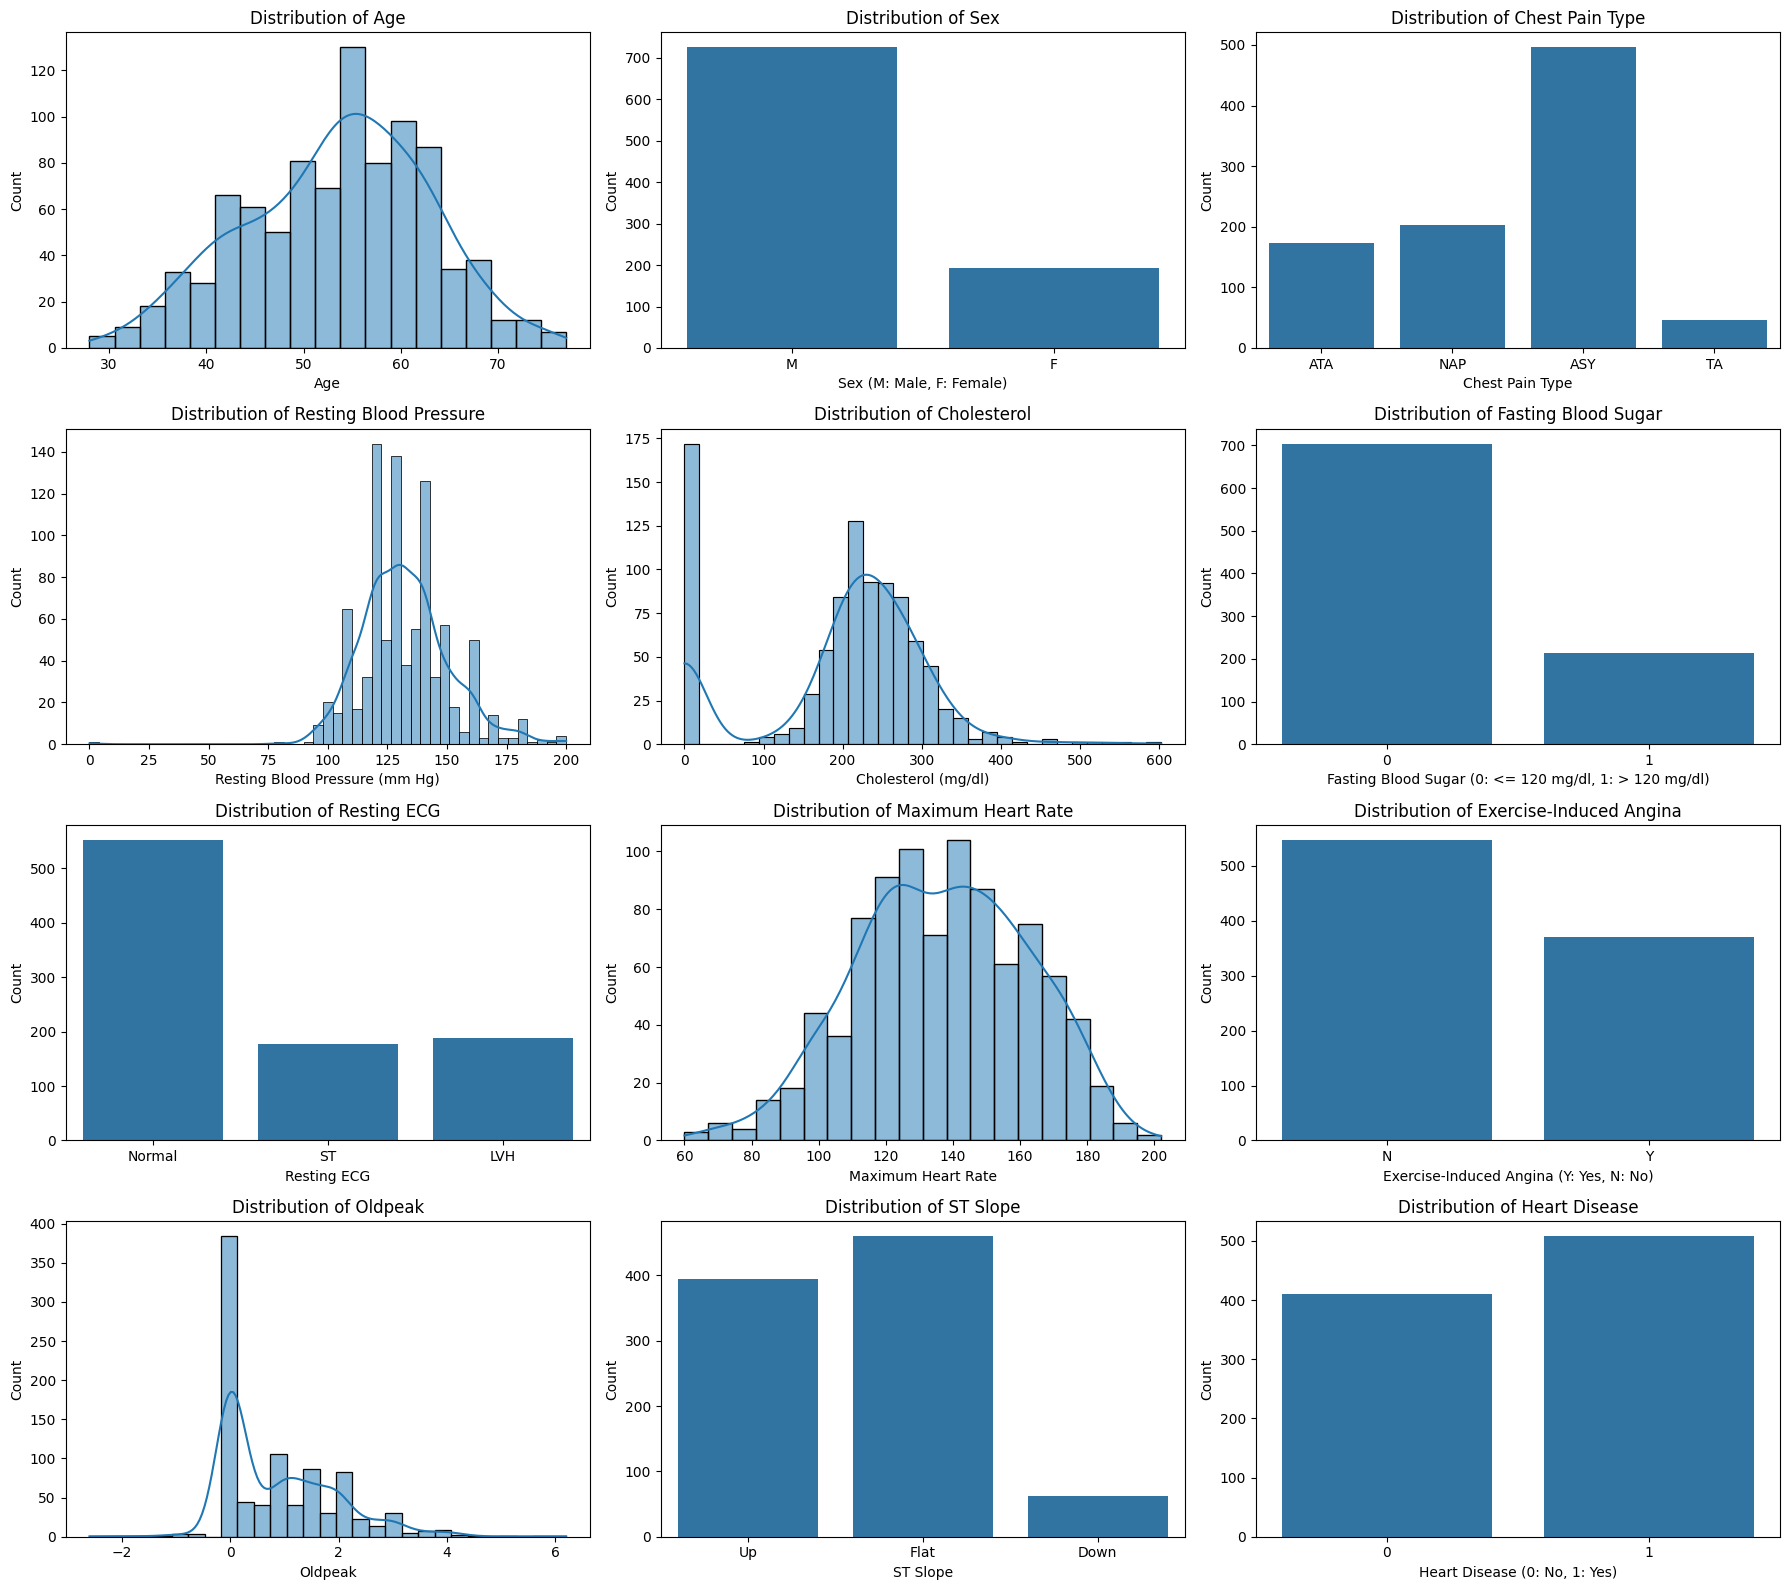

In [11]:
def plot_distributions(df):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))

    # Plot 1: Distribution of Age
    sns.histplot(ax=axes[0, 0], x='age', data=df, kde=True)
    axes[0, 0].set_title('Distribution of Age')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Count')

    # Plot 2: Distribution of Sex
    sns.countplot(ax=axes[0, 1], x='sex', data=df)
    axes[0, 1].set_title('Distribution of Sex')
    axes[0, 1].set_xlabel('Sex (M: Male, F: Female)')
    axes[0, 1].set_ylabel('Count')

    # Plot 3: Distribution of Chest Pain Type
    sns.countplot(ax=axes[0, 2], x='chestpaintype', data=df)
    axes[0, 2].set_title('Distribution of Chest Pain Type')
    axes[0, 2].set_xlabel('Chest Pain Type')
    axes[0, 2].set_ylabel('Count')

    # Plot 4: Distribution of Resting Blood Pressure
    sns.histplot(ax=axes[1, 0], x='restingbp', data=df, kde=True)
    axes[1, 0].set_title('Distribution of Resting Blood Pressure')
    axes[1, 0].set_xlabel('Resting Blood Pressure (mm Hg)')
    axes[1, 0].set_ylabel('Count')

    # Plot 5: Distribution of Cholesterol
    sns.histplot(ax=axes[1, 1], x='cholesterol', data=df, kde=True)
    axes[1, 1].set_title('Distribution of Cholesterol')
    axes[1, 1].set_xlabel('Cholesterol (mg/dl)')
    axes[1, 1].set_ylabel('Count')

    # Plot 6: Distribution of Fasting Blood Sugar
    sns.countplot(ax=axes[1, 2], x='fastingbs', data=df)
    axes[1, 2].set_title('Distribution of Fasting Blood Sugar')
    axes[1, 2].set_xlabel('Fasting Blood Sugar (0: <= 120 mg/dl, 1: > 120 mg/dl)')
    axes[1, 2].set_ylabel('Count')

    # Plot 7: Distribution of Resting ECG
    sns.countplot(ax=axes[2, 0], x='restingecg', data=df)
    axes[2, 0].set_title('Distribution of Resting ECG')
    axes[2, 0].set_xlabel('Resting ECG')
    axes[2, 0].set_ylabel('Count')

    # Plot 8: Distribution of Maximum Heart Rate
    sns.histplot(ax=axes[2, 1], x='maxhr', data=df, kde=True)
    axes[2, 1].set_title('Distribution of Maximum Heart Rate')
    axes[2, 1].set_xlabel('Maximum Heart Rate')
    axes[2, 1].set_ylabel('Count')

    # Plot 9: Distribution of Exercise-Induced Angina
    sns.countplot(ax=axes[2, 2], x='exerciseangina', data=df)
    axes[2, 2].set_title('Distribution of Exercise-Induced Angina')
    axes[2, 2].set_xlabel('Exercise-Induced Angina (Y: Yes, N: No)')
    axes[2, 2].set_ylabel('Count')

    # Plot 10: Distribution of Oldpeak
    sns.histplot(ax=axes[3, 0], x='oldpeak', data=df, kde=True)
    axes[3, 0].set_title('Distribution of Oldpeak')
    axes[3, 0].set_xlabel('Oldpeak')
    axes[3, 0].set_ylabel('Count')

    # Plot 11: Distribution of ST Slope
    sns.countplot(ax=axes[3, 1], x='st_slope', data=df)
    axes[3, 1].set_title('Distribution of ST Slope')
    axes[3, 1].set_xlabel('ST Slope')
    axes[3, 1].set_ylabel('Count')

    # Plot 12: Distribution of Heart Disease
    sns.countplot(ax=axes[3, 2], x='heartdisease', data=df)
    axes[3, 2].set_title('Distribution of Heart Disease')
    axes[3, 2].set_xlabel('Heart Disease (0: No, 1: Yes)')
    axes[3, 2].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_distributions(df)

**Understanding Oldpeak in Medical Terminology**

In medical terminology, oldpeak refers to the ST depression induced by exercise relative to rest in an electrocardiogram (ECG) stress test. A value of 0 indicates:

- No ST segment depression during the exercise test
- No significant difference between the ST segment at rest and during exercise
- Potentially normal heart function from this particular measurement

However, it's important to note that while 0 is a possible value, its interpretation depends on the full clinical context. A zero value doesn't automatically mean everything is normal, as other factors and additional tests would be considered in a comprehensive cardiac evaluation. If you're working with a medical dataset or researching cardiac health, a zero value for oldpeak is a valid observation that would be included in the data analysis.

**Negative Values in Oldpeak**

Negative values would not make physiological sense in this dataset because:

- Depression refers to a downward movement from the baseline
- There cannot be a "negative" downward movement
- The measurement is typically quantified in millimeters (mm) or as a relative change from the resting ECG

In case of this dataset, it's likely:

- A data entry error
- A mistake in data processing
- An incorrectly calculated measurement



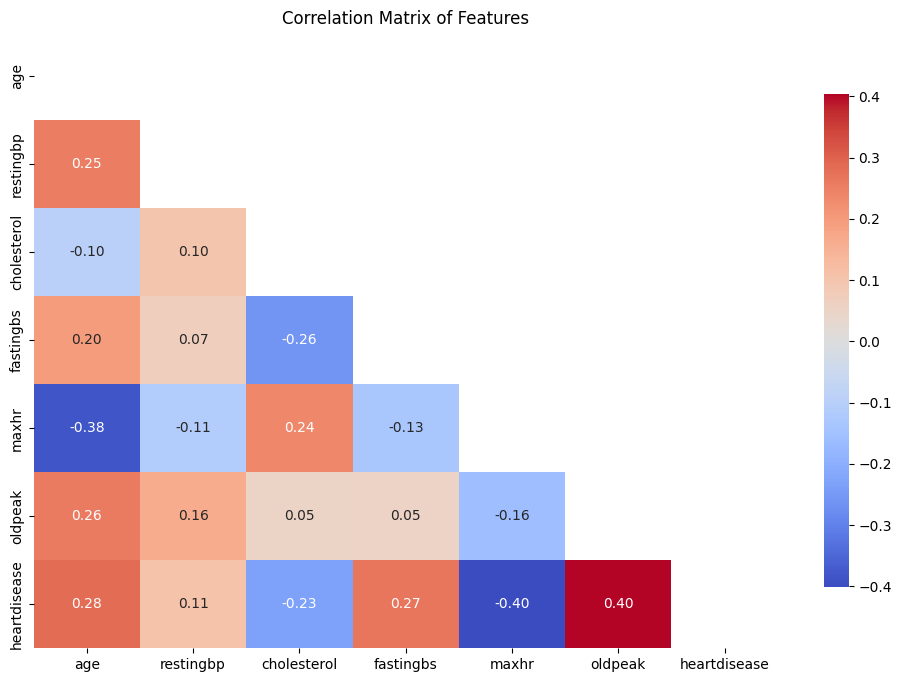

In [12]:
# correlation matrix
def correlation_matrix(df):
    # Compute the correlation matrix
    
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    corr = numerical_df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Draw the heatmap with the mask
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})

    plt.title('Correlation Matrix of Features')
    plt.show()

correlation_matrix(df)



For the purpose of this analysis, we will assume that negative values are errors and will replace them with 0.

In [13]:
df.loc[df['oldpeak'] < 0, 'oldpeak'] = 0

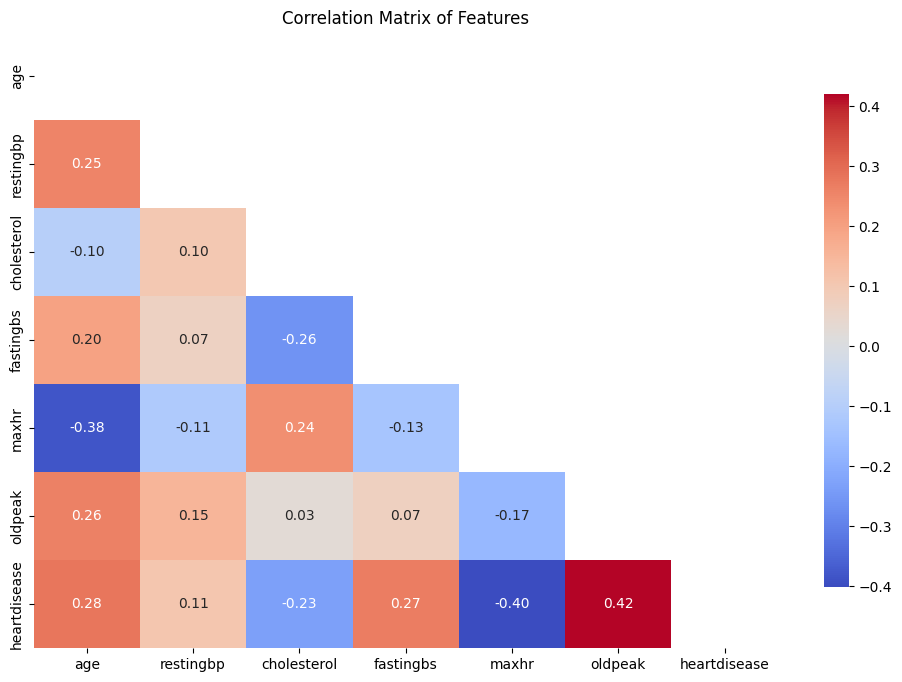

In [14]:
correlation_matrix(df)


**Cholersterol Distribution**

The distribution of cholesterol levels in the dataset is right-skewed, with most patients having cholesterol levels between 200 and 300 mg/dL. This is consistent with typical cholesterol distributions in the population. However, as correlation between cholesterol levels and heart disease is negative, further analysis is needed to understand this relationship. The distribution of cholesterol levels in the dataset has values of 0 which are likely to be errors or missing values. We will replace these values with the median cholesterol level to avoid any impact on the analysis.

In [15]:
df.loc[df['cholesterol'] == 0, 'cholesterol'] = df['cholesterol'].median()

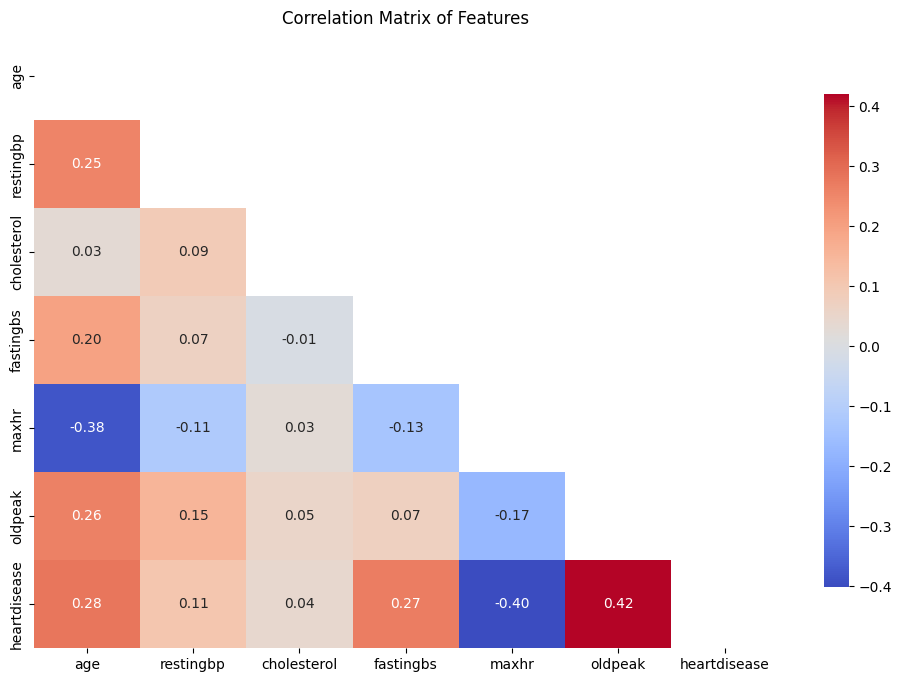

In [16]:
correlation_matrix(df)

Positive correlation between cholesterol levels and heart disease is consistent with medical knowledge. High cholesterol levels are a known risk factor for heart disease, and this relationship is reflected in the dataset. The distribution of cholesterol levels in patients with heart disease shows a shift towards higher values compared to patients without heart disease. This suggests that cholesterol levels may be a relevant feature for predicting heart disease. Hovewer, the dataset does not contain any information about the type of cholesterol (HDL, LDL, etc.), which could provide more insights into the relationship between cholesterol levels and heart disease.

**Maximum Heart Rate Distribution**

People with heart diseases, such as heart failure, may have a reduced ability to achieve HRmax, which is a result of weakened heart function and decreased cardiac reserve. This is the result of negative feedback mechanisms that the body uses to protect itself from further damage. The body will try to limit the heart rate to prevent further damage to the heart muscle. This is why people with heart diseases may have a lower HRmax compared to healthy individuals. This is consistent with the data, as patients with heart disease have a lower HRmax compared to patients without heart disease (negative correlation between HRmax and heart disease). 

However, the distribution of HRmax shows values of 0 which are likely to be errors or missing values. We will replace these values with the median HRmax to avoid any impact on the analysis.

In [17]:
df.loc[df['maxhr'] == 0, 'maxhr'] = df['maxhr'].median()

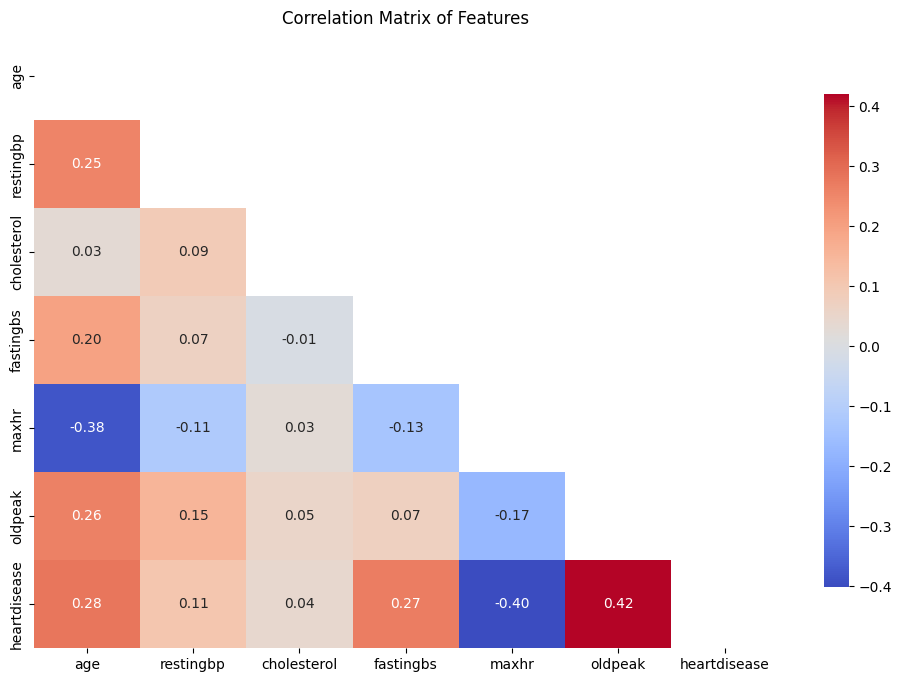

In [18]:
correlation_matrix(df)

2024-12-18 13:43:18,366 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-18 13:43:18,373 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-18 13:43:18,643 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-18 13:43:18,650 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


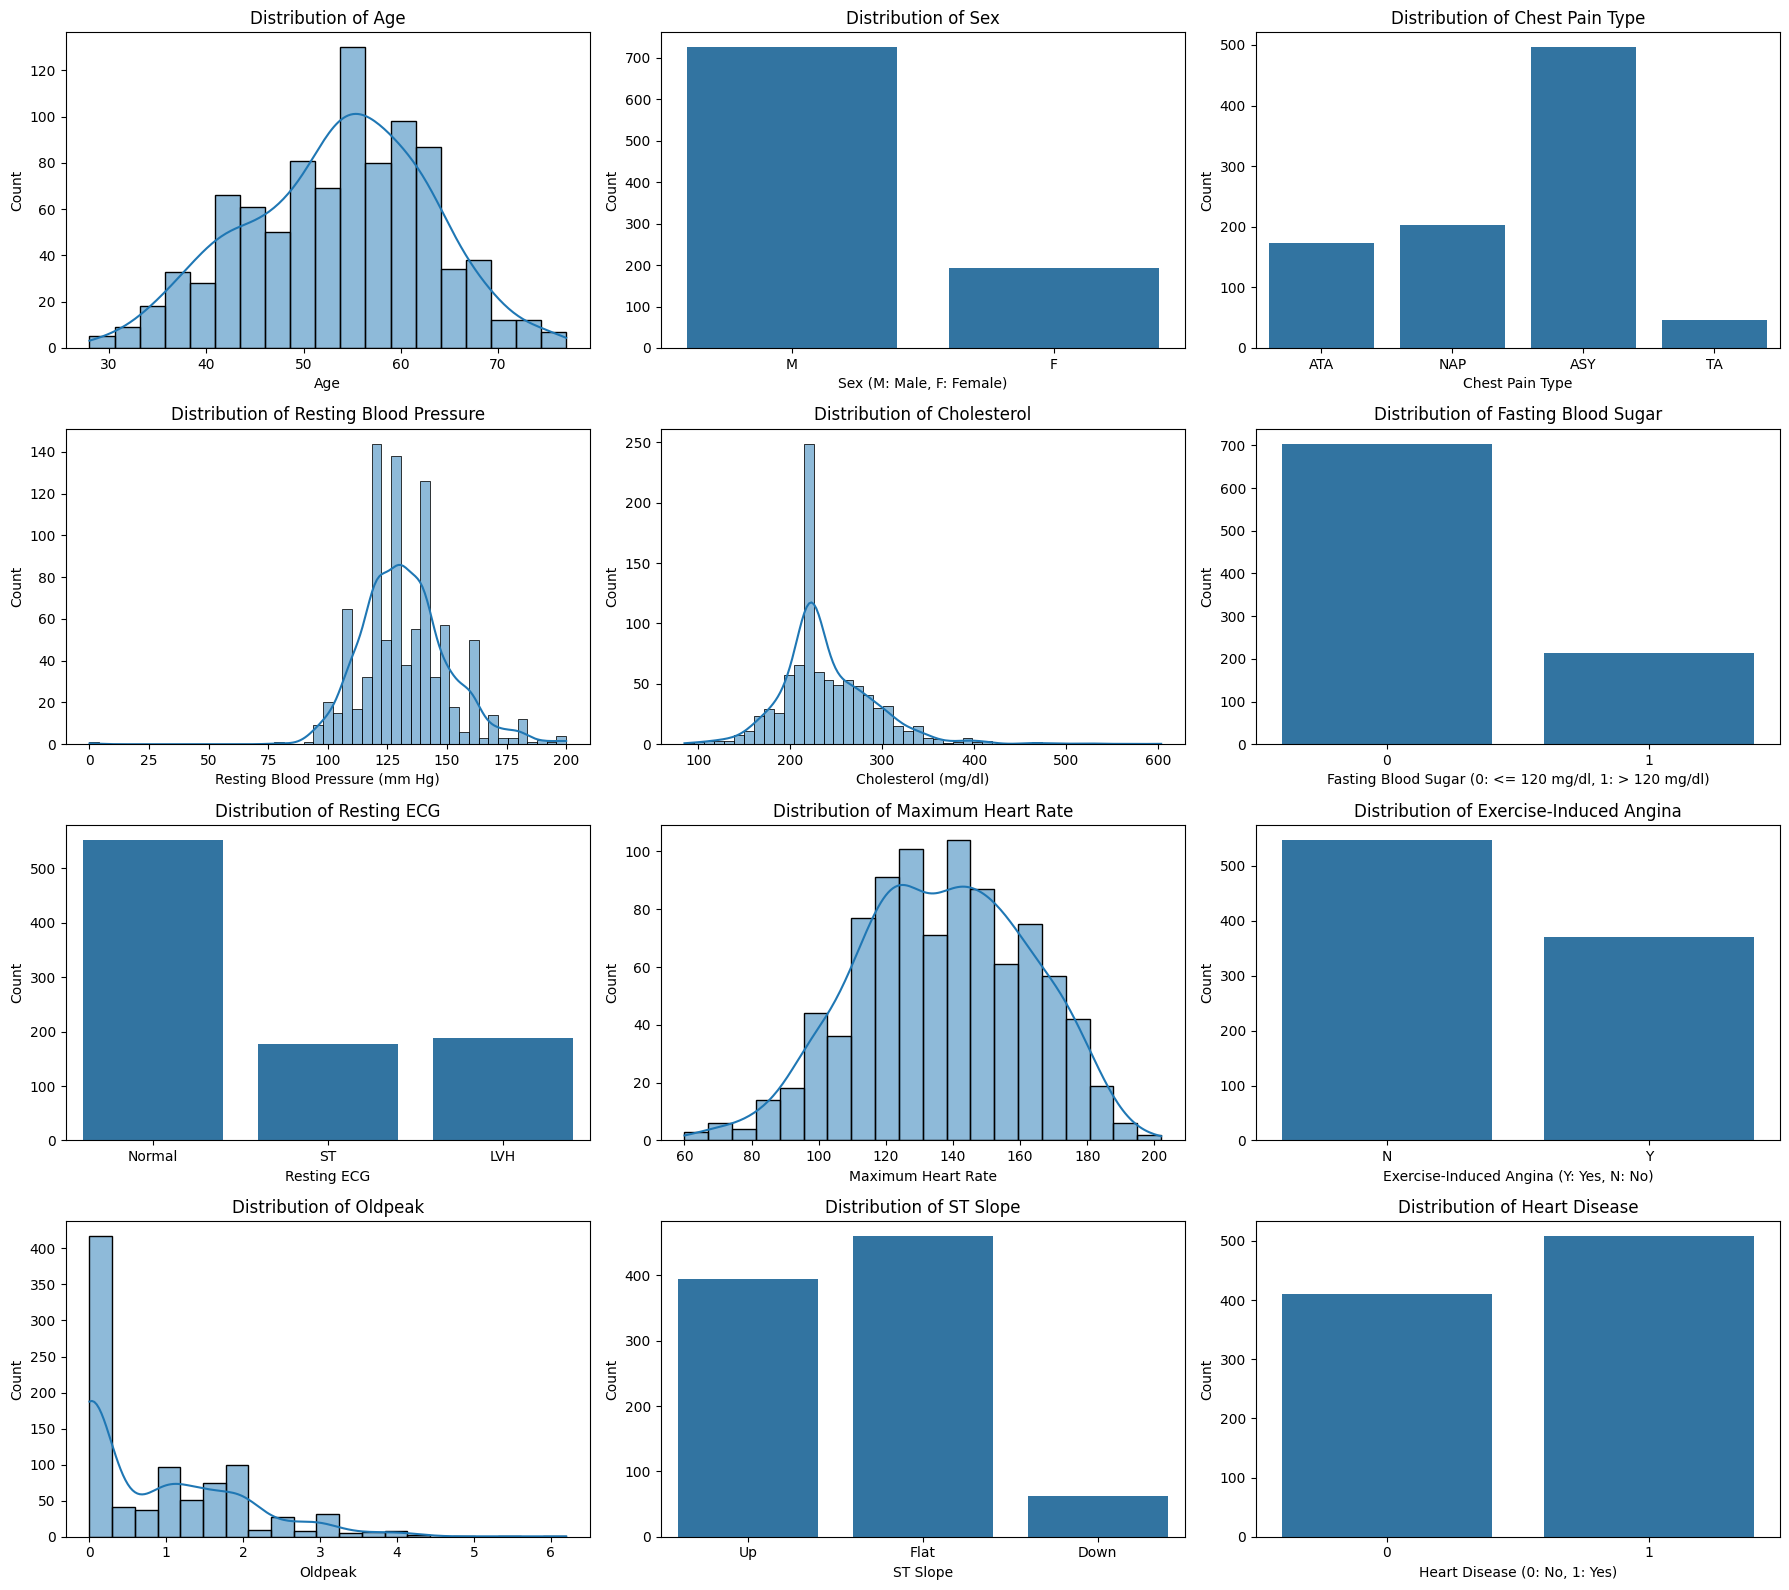

In [19]:
plot_distributions(df)

Distribution of oldpeak shows right skewness, with most patients having values between 0 and 2. Using XGBClassifier, we can omit using log-transformations for the skewed features as it can handle non-linear relationships between features and target variable.

## Modeling

### Train-Test Split

In [20]:
# Split the dataset into features and target variable

X = df.drop(columns='heartdisease')
y = df['heartdisease']

In [28]:
# Convert categorical features to 'category' dtype
logging.info("Converting categorical features to 'category' dtype...")
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype('category')

2024-12-18 13:47:29,878 - Converting categorical features to 'category' dtype...


In [22]:
# Split data into training and testing sets
logging.info("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

2024-12-18 13:43:25,444 - Splitting the dataset into train and test sets...


### Model Training and Evaluation

#### XGBoost Classifier

In [23]:
# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 1, 5]
}

In [24]:
# %%capture output
# XGBoost Classifier with enable_categorical=True
logging.info("Starting GridSearchCV for XGBoost Classifier...")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=True)
grid_search_xgb = GridSearchCV(
    xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# s = output.stdout
# print(s)

logging.info("Completed GridSearchCV for XGBoost Classifier.")

# Get the best estimator
xgb_best_model = grid_search_xgb.best_estimator_

2024-12-18 13:43:30,040 - Starting GridSearchCV for XGBoost Classifier...


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/home/rafal/Dokumenty/projekty/ml-zoomcamp-2024/capstone/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
2024-12-18 13:45:24,148 - Completed GridSearchCV for XGBoost Classifier.


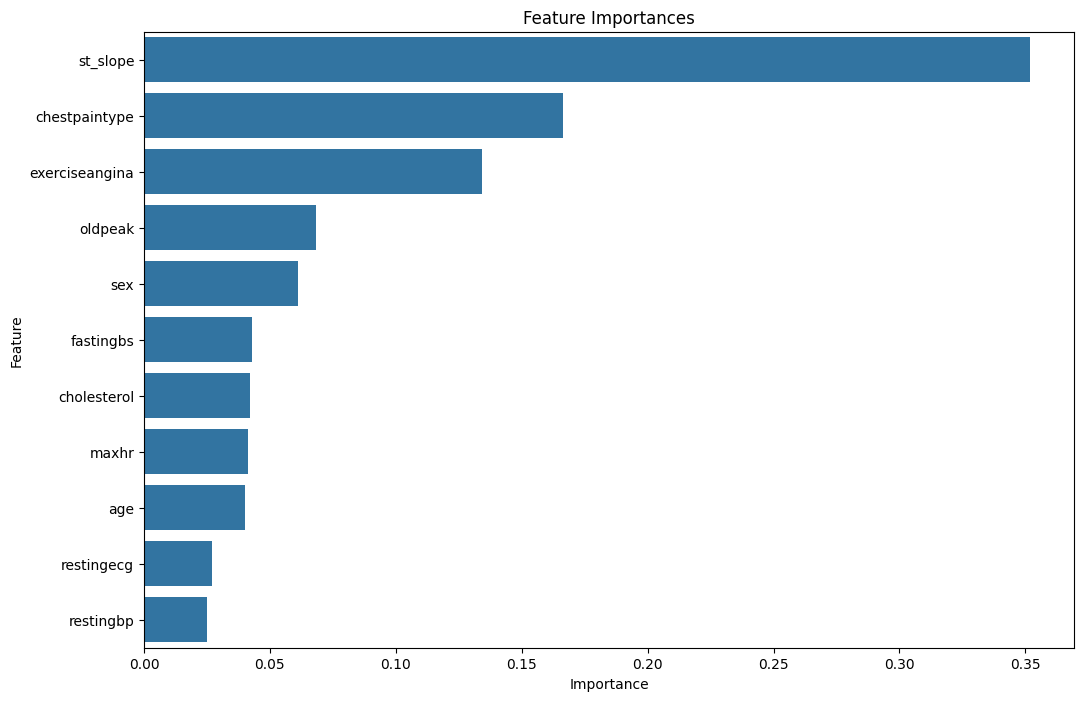

In [38]:
# Assuming xgb_best_model is the best estimator from GridSearchCV
# and X_train is your training data

# Get feature importances
feature_importances = xgb_best_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Metrics and Evaluation** - XGBClassifier

2024-12-18 13:49:19,763 - Evaluating the XGBoost model on the test set...



XGBoost Results:
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Accuracy: 0.8695652173913043
Precision: 0.9029126213592233
Recall: 0.8691588785046729
F1 Score: 0.8857142857142857
ROC AUC Score: 0.9272970020633572


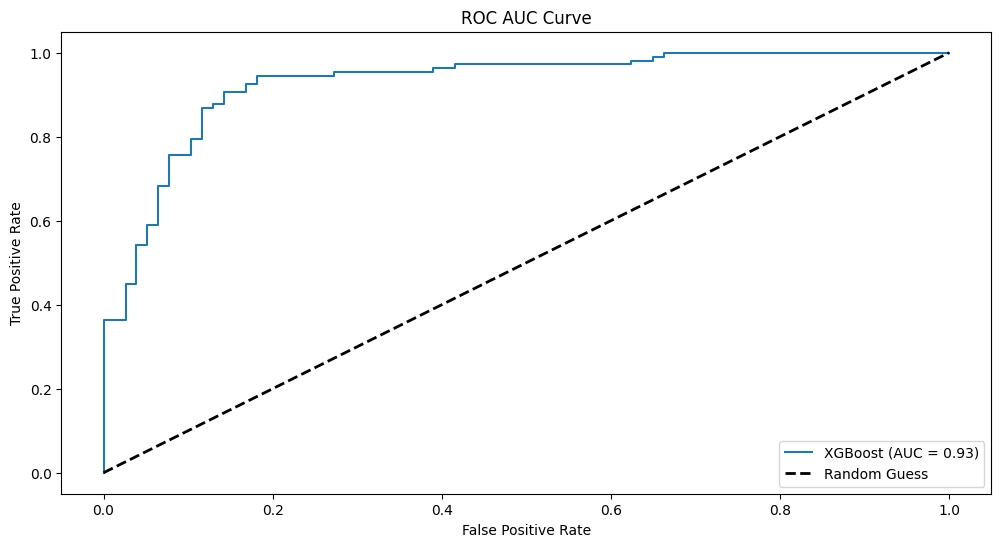

In [33]:
# Evaluate the XGBoost model on the test set
logging.info("Evaluating the XGBoost model on the test set...")
y_pred_xgb = xgb_best_model.predict(X_test)
y_pred_proba_xgb = xgb_best_model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

print("\nXGBoost Results:")
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.show()

In [36]:
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In this project, we use the XGBoost library to build a machine learning model for predicting heart disease. One important aspect of using XGBoost is handling categorical features. Typically, categorical features need to be converted into a numerical format using techniques like one-hot encoding or using a DictVectorizer. However, XGBoost provides a convenient way to handle categorical features directly by using enable_categorical [7].

In [39]:
# save best model
logging.info("Saving the best XGBoost model to disk...")


# Assuming grid_search is your GridSearchCV object and it has been fitted
# Define the directory and filename
model_directory = 'model'
model_filename = 'best_xgboost_model.joblib'

# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)

# Save the model
model_path = os.path.join(model_directory, model_filename)
joblib.dump(grid_search_xgb.best_estimator_, model_path)

print(f'Model saved to {model_path}')


2024-12-18 13:50:23,142 - Saving the best XGBoost model to disk...


Model saved to model/best_xgboost_model.joblib


#### Random Forest Classifier

In [49]:
param_grid_random_forest = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [50]:
logging.info("Starting GridSearchCV for Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(X_train.to_dict(orient='records'))
grid_search_rf = GridSearchCV(
    rf_model, param_grid_random_forest, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train_encoded, y_train)

logging.info("Completed GridSearchCV for Random Forest Classifier.")

# Get the best estimator
rf_best_model = grid_search_rf.best_estimator_

2024-12-17 14:12:11,165 - Starting GridSearchCV for Random Forest Classifier...


Fitting 5 folds for each of 108 candidates, totalling 540 fits


2024-12-17 14:13:13,174 - Completed GridSearchCV for Random Forest Classifier.


**Metrics and Evaluation** - Random Forest Classifier

Although we can be satisfied with the XGBoost model, we can also try the Random Forest Classifier to see if it can provide better results. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees. Random Forest is a versatile algorithm that can be used for both classification and regression tasks. It also provides a good indication of the feature importance in the dataset.

2024-12-17 14:13:42,571 - Evaluating the Random Forest model on the test set...



Random Forest Results:
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Accuracy: 0.8369565217391305
Precision: 0.8888888888888888
Recall: 0.822429906542056
F1 Score: 0.8543689320388349
ROC AUC Score: 0.9219565481247725


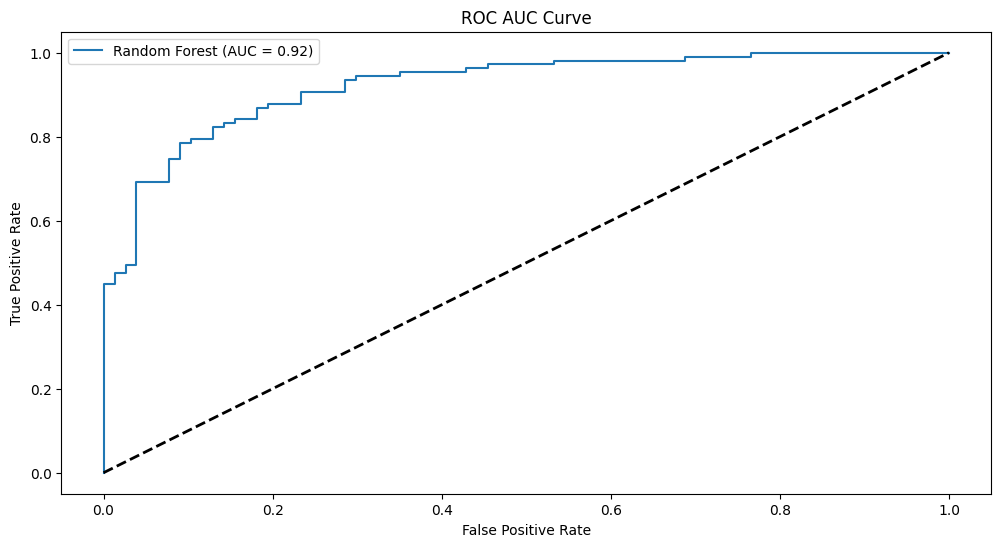

In [51]:
logging.info("Evaluating the Random Forest model on the test set...")
X_test_encoded = dv.transform(X_test.to_dict(orient='records'))
y_pred_rf = rf_best_model.predict(X_test_encoded)
y_pred_proba_rf = rf_best_model.predict_proba(X_test_encoded)[:, 1]  # Get the predicted probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("\nRandom Forest Results:")
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.show()

In [40]:
record = 32
df_test = pd.read_csv('heart.csv')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')
dis = df_test['heartdisease']
df_test.drop(columns=['heartdisease'], inplace=True)

df_test = df_test.iloc[record].to_dict()
print(df_test)

# Convert the sample record to a DataFrame
df_test_df = pd.DataFrame([df_test])

for column in df_test_df.select_dtypes(include=['object']).columns:
    df_test_df[column] = df_test_df[column].astype('category')

# Predict the price using the best model
predicted = xgb_best_model.predict(df_test_df)

# Print the predicted price
print(f"Predicted probability of disease: {predicted[0]} and actual target: {dis.iloc[record]}")

{'age': 54, 'sex': 'M', 'chestpaintype': 'ASY', 'restingbp': 125, 'cholesterol': 224, 'fastingbs': 0, 'restingecg': 'Normal', 'maxhr': 122, 'exerciseangina': 'N', 'oldpeak': 2.0, 'st_slope': 'Flat'}
Predicted probability of disease: 1 and actual target: 1


# Conclusions and further work

In this capstone project, we aimed to build a machine learning model to predict the presence of heart disease based on various health metrics and demographic information. We used the `heart.csv` dataset, which contains information about patients, including their age, sex, cholesterol levels, and other health indicators. Below are the key findings and conclusions from our analysis:

#### Data Preprocessing
- Corrected erroneous data entries.
- Converted categorical features to the `category` data type to ensure compatibility with the Random Forest classifier.
- Dataset imbalance in terms of sex distribution was observed, with more male patients than female patients. This could potentially impact the model's performance, and further analysis is needed to understand its implications.

#### Exploratory Data Analysis (EDA)
- Visualized the distributions of various features and the target variable.
- Observed that certain features, such as cholesterol levels and maximum heart rate, had significant correlations with heart disease.

#### Modeling
- Trained several machine learning models, including Random Forest, and XGBoost.
- Used `GridSearchCV` for hyperparameter tuning and selected the best model based on evaluation metrics.

#### XGBoost Classifier
- Leveraged XGBoost's ability to handle categorical features directly by enabling the `enable_categorical` parameter, simplifying the preprocessing pipeline.
- Achieved high accuracy, precision, recall, F1 score, and ROC AUC score, demonstrating its effectiveness in predicting heart disease.

#### Feature Importance
- Analyzed feature importances from the XGBoost model, which highlighted the most relevant features for predicting heart disease.

---

## Further Work

While the results of this project are promising, there are several areas for further improvement and exploration:

#### Feature Engineering
- Explore additional feature engineering techniques to create new features that may improve model performance.
- Investigate the impact of different types of cholesterol (e.g., HDL, LDL) on heart disease prediction.

#### Model Ensemble
- Experiment with ensemble methods that combine multiple models to potentially improve prediction accuracy.

#### Cross-Validation
- Perform more extensive cross-validation to ensure the robustness and generalizability of the model.

#### External Validation
- Validate the model on external datasets to assess its performance on different populations and ensure its applicability in real-world scenarios.

#### Explainability
- Use model explainability techniques, such as SHAP (SHapley Additive exPlanations), to better understand the model's predictions and provide insights to healthcare professionals.

#### Deployment
- Develop a deployment pipeline to integrate the model into a real-world application, such as a web or mobile app, to assist healthcare providers in diagnosing heart disease.

By addressing these areas, we can further enhance the model's performance and utility, ultimately contributing to better healthcare outcomes for patients at risk of heart disease.


## Bibliography

For more information, please refer to the following sources:

1. [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
2. [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)
3. [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
4. [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
5. [Seaborn Documentation](https://seaborn.pydata.org/)
6. [Heart Disease Prediction using Machine Learning](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)
7. [XGBoost: Categorical Data](https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html#categorical-data)